In [1]:
### Importing  all Basic Commands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
%matplotlib inline
from glob import glob

In [2]:
# df1 is a data frame which contain columns of High School of WECDSB
df1 =  pd.read_csv("/content/HS_Clients_Device_Download_in_Percent.csv")

In [3]:
df1

,School_ID,Date,# Clients,Download_mbps,Total_mbps,Utilized_in_Percent
0,100_HS,2022-09-01,392,3.175000,3.786571,6.533486
1,164_HS,2022-09-01,352,4.605143,5.450857,6.533486
2,201_HS,2022-09-01,324,3.305143,4.022857,6.533486
3,232_HS,2022-09-01,296,4.097143,4.694571,6.533486
4,100_HS,2022-09-02,362,5.037667,5.807667,6.533486
...,...,...,...,...,...,...
715,232_HS,2023-02-26,414,6.113833,6.236667,6.097222
716,100_HS,2023-02-27,2207,89.240333,92.444167,16.444444
717,164_HS,2023-02-27,2246,94.750833,95.535667,17.694444
718,201_HS,2023-02-27,2464,99.107500,99.422167,17.722222


In [4]:
# df1 is a data frame which contain weather data of windsor
df2 = pd.read_csv("/content/Weather_Data2_sep_to_feb.csv")


In [5]:
df2

,Longitude (x),Latitude (y),Station Name,Climate ID,Date,Temp (°C),Rel Hum (%),Weather
0,-82.96,42.28,WINDSOR A,6139530,2022-09-01,18.9,75.0,Normal
1,-82.96,42.28,WINDSOR A,6139530,2022-09-01,18.0,80.0,Normal
2,-82.96,42.28,WINDSOR A,6139530,2022-09-01,17.8,81.0,Normal
3,-82.96,42.28,WINDSOR A,6139530,2022-09-01,18.6,78.0,Normal
4,-82.96,42.28,WINDSOR A,6139530,2022-09-01,16.7,86.0,Normal
...,...,...,...,...,...,...,...,...
4339,-82.96,42.28,WINDSOR A,6139530,2023-02-28,3.7,82.0,Normal
4340,-82.96,42.28,WINDSOR A,6139530,2023-02-28,2.3,88.0,Normal
4341,-82.96,42.28,WINDSOR A,6139530,2023-02-28,2.4,87.0,Normal
4342,-82.96,42.28,WINDSOR A,6139530,2023-02-28,2.4,87.0,Normal


In [6]:
# converting date into date column in df2
df2['Date'] = pd.to_datetime(df2['Date'])

In [7]:
# converting date into date column in df1
df1['Date'] = pd.to_datetime(df1['Date'])


In [8]:
# drop columns from weather data which is not required for our analysis
df2 = df2.drop(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID','Weather'], axis=1)

In [9]:
# drop column fron df1
df1 = df1.drop(['School_ID', 'Download_mbps', 'Total_mbps'], axis=1)

In [10]:
# Rename columns in df1 
df1 = df1.rename(columns={'# Clients': 'Clients','Utilized_in_Percent': 'Device_utilization_in_percent'})

In [11]:
# group data by 'group' column and calculate mean of 'value'
df2 = df2.groupby('Date').mean()
df2

,Temp (°C),Rel Hum (%)
Date,,
2022-09-01,21.195833,66.083333
2022-09-02,22.095833,75.125000
2022-09-03,23.933333,76.958333
2022-09-04,20.083333,90.041667
2022-09-05,20.170833,86.791667
...,...,...
2023-02-24,-3.129167,60.500000
2023-02-25,-1.895833,79.125000
2023-02-26,3.037500,59.291667


In [12]:
# group data by 'group' column and calculate mean of 'value'
df1 = df1.groupby('Date').mean()
df1

,Clients,Device_utilization_in_percent
Date,,
2022-09-01,341.00,6.533486
2022-09-02,292.00,6.533486
2022-09-03,171.75,6.533487
2022-09-04,170.75,6.533484
2022-09-05,194.75,6.533476
...,...,...
2023-02-23,858.00,8.694891
2023-02-24,1393.00,11.865100
2023-02-25,310.75,5.697917


In [13]:
df2 = df2.round(1)
df2

,Temp (°C),Rel Hum (%)
Date,,
2022-09-01,21.2,66.1
2022-09-02,22.1,75.1
2022-09-03,23.9,77.0
2022-09-04,20.1,90.0
2022-09-05,20.2,86.8
...,...,...
2023-02-24,-3.1,60.5
2023-02-25,-1.9,79.1
2023-02-26,3.0,59.3


In [14]:
df1= df1.round(1)

df1.head(10)

,Clients,Device_utilization_in_percent
Date,,
2022-09-01,341.0,6.5
2022-09-02,292.0,6.5
2022-09-03,171.8,6.5
2022-09-04,170.8,6.5
2022-09-05,194.8,6.5
2022-09-06,1865.5,6.5
2022-09-07,2050.5,6.5
2022-09-08,2111.2,6.5
2022-09-09,2103.5,6.5


In [15]:
# Merge the two DataFrames on the 'ID' column
df = pd.merge(df1, df2, on='Date')
df

,Clients,Device_utilization_in_percent,Temp (°C),Rel Hum (%)
Date,,,,
2022-09-01,341.0,6.5,21.2,66.1
2022-09-02,292.0,6.5,22.1,75.1
2022-09-03,171.8,6.5,23.9,77.0
2022-09-04,170.8,6.5,20.1,90.0
2022-09-05,194.8,6.5,20.2,86.8
...,...,...,...,...
2023-02-23,858.0,8.7,1.2,90.3
2023-02-24,1393.0,11.9,-3.1,60.5
2023-02-25,310.8,5.7,-1.9,79.1


In [16]:
# cheacking null values in data 
df.isnull().sum()

Clients                          0
Device_utilization_in_percent    0
Temp (°C)                        0
Rel Hum (%)                      0
dtype: int64

In [17]:
# divide data into X and Y
X = df.drop(columns ='Device_utilization_in_percent')
y = df['Device_utilization_in_percent']

In [18]:
# now importing train test split for the splitting of data
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state = 0)

# Now its time to build model for High Schools of WECDSB

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
# Checking the intercept of model
c =model.intercept_
c

3.933445852237858

In [21]:
# Checking the coficent of model
m = model.coef_
m

array([ 0.00551982, -0.04235688,  0.00592878])

In [22]:
y_pred_train = model.predict(x_train)

In [23]:
y_pred_train

array([15.79874864, 16.65297182,  6.26835706, 16.69656087, 16.11166353,
        5.70793194, 16.53537546, 16.10921463,  6.01194963, 15.70749183,
        5.69248564,  5.68699103, 16.90073806, 12.1125498 , 16.09950132,
       14.35567095,  4.32593718,  5.3793958 , 16.57149772, 16.76206701,
       15.7319061 ,  4.46129049,  5.90721501,  5.58122842, 16.07121817,
       16.35914163, 15.67550904, 17.17008867,  5.74219835,  5.86021863,
       16.75017553, 15.79808369,  6.19844988,  5.84132926,  6.25039519,
        5.87740173,  5.7598538 , 16.46713753, 17.01178466, 16.66798432,
       16.2148617 , 15.41778747,  6.09540177,  4.95909175, 16.10910214,
       15.47972075, 14.93635745,  7.56498987,  5.01471085,  5.81803265,
       16.94314153,  4.55844766,  5.74655549, 16.65041628, 14.87883809,
       16.36769673, 17.0732313 , 16.56759746, 17.0234924 , 15.42990001,
       16.98091488, 15.97839792, 15.6264135 ,  5.30963026, 16.48020457,
       16.40483569, 16.08195016, 15.46264781,  5.58487897, 16.65

Text(0, 0.5, 'predicted Devices_utilization_in_percent')

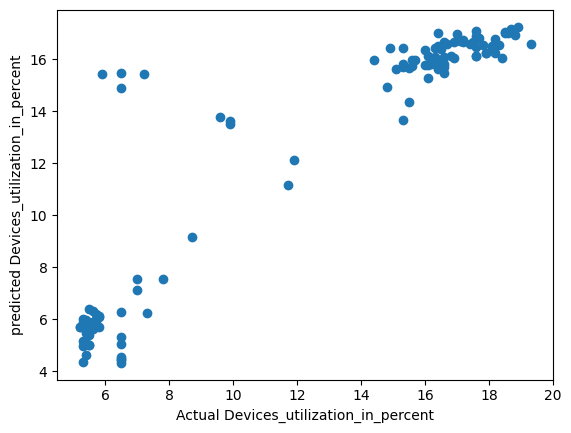

In [24]:
# plot the graph 
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Devices_utilization_in_percent")
plt.ylabel("predicted Devices_utilization_in_percent")

# Evaluate the model

In [25]:
from sklearn.metrics import r2_score

r2_score(y_train,y_pred_train)

0.8768325658803447

In [26]:
y_pred_test= model.predict(x_test)

Text(0, 0.5, 'predicted Devices_utilization_in_percent')

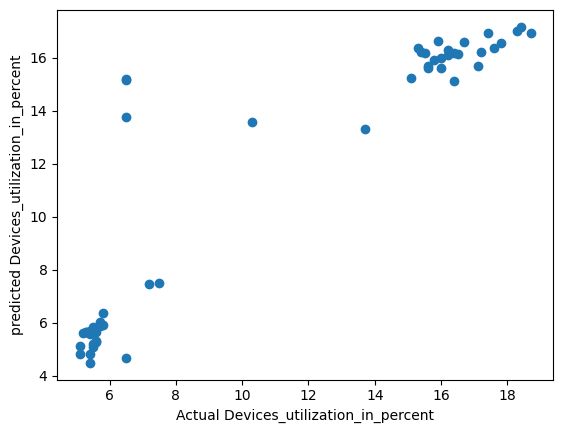

In [27]:
# now checking the model accuracy with test data

plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Devices_utilization_in_percent")
plt.ylabel("predicted Devices_utilization_in_percent")

Evaluate the test data in predict model

In [28]:
r2_score(y_test,y_pred_test)

0.8455965775063751

In [29]:
# Calculate MSE, R2 score, and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the results
print("MSE:", mse)
print("R2 score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 4.414180458903213
R2 score: 0.8455965775063751
MAE: 0.9862468581537868
RMSE: 2.100995111584797


In [30]:
model.predict([[2000,-2,50.1]])

array([15.35482741])

In [33]:
from joblib import dump
dump(model, 'model_HS.joblib')

['model_HS.joblib']